In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("D:\\Data Science\\Suicide rate\\master.csv")

In [3]:
dataset.shape

(27820, 12)

In [4]:
dataset.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
dataset.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
data=dataset[dataset.country=="Brazil"]
data.shape
data.sample(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4280,Brazil,1994,male,75+ years,180,793671,22.68,Brazil1994,NaN,"558,111,997,497",3925,G.I. Generation
4360,Brazil,2000,female,15-24 years,345,17175577,2.01,Brazil2000,0.683,"655,420,645,477",4156,Generation X
4179,Brazil,1985,female,25-34 years,269,10798700,2.49,Brazil1985,0.576,"222,942,790,435",1898,Boomers


In [7]:
countries=dataset.country.unique().tolist()
countries[:5]

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba']

In [15]:
len(countries)
len(dataset['country'])

27820

In [14]:
suicide_no = []
for c in countries:
    s = 0 
    for i in range(0, len(dataset.country)):
        if(c==dataset.country[i]):
            s += dataset.iloc[i]['suicides_no']
    suicide_no.append(s)

In [13]:
print(countries[0])
print(suicide_no[0])

Albania
1970


In [31]:
d = {'country' : countries, 'total_suicides' : suicide_no}
suicide_world = pd.DataFrame(data=d)
indexes = suicide_world['total_suicides'].sort_values(ascending=False)[:10].index.tolist()
top_suicide_no = []
top_countries = []
for i in indexes:
    top_countries.append(suicide_world.iloc[i].country)
    top_suicide_no.append(suicide_world.iloc[i]['total_suicides'])
    
print(top_countries)
print(top_suicide_no)

['Russian Federation', 'United States', 'Japan', 'France', 'Ukraine', 'Germany', 'Republic of Korea', 'Brazil', 'Poland', 'United Kingdom']
[1209742, 1034013, 806902, 329127, 319950, 291262, 261730, 226613, 139098, 136805]


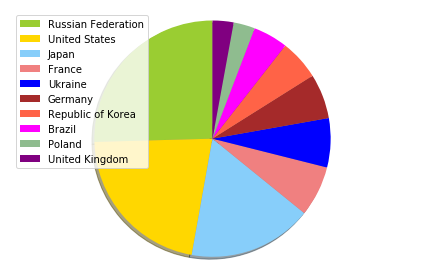

In [34]:
labels = top_countries
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'brown', 'tomato', 'magenta', 'darkseagreen', 'purple']
patches, texts = plt.pie(top_suicide_no, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()